# **Hypotheses prioritization and AB test analysis. Data from an online store**

There are two files: hypotheses and orders. The first one contains 8 hypotheses and we need to prioritize them according to the frameworks RICE and ICE. 'Hypotheses' includes four parameters: Reach, Impact, Confidence and Effort. 

The second dataset contains data from an AB test. The goal of the experiment is to check whether or not the new registration form helps us to grow conversion. While the right methodology for AB testing to only try to grow one metric at a time, for educational purposes I will also check whether or not average receipts in the two groups differ statistically significantly. This is mostly done for the educational purposes. Let's also assume that prior to the AB test we conducted AA test and no metrics in two groups were different statistically significantly. 


**A is the test group, B - control**

In [1]:
# importing libraries

from collections import Counter 
import datetime as dt

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
#import pandas_profiling as pd_p

plt.style.use('dark_background')
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:80% !important;}</style>'))
from IPython.display import display, Markdown
pd.set_option('display.float.format', lambda x: '%.3f' %x)
#pd.set_option('display.max_colwidth', None)

1. [Part 1. Hypotheses priritization](#step1)  
2. [Part 2. AB test analysis](#step2)

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

# making columns lowercase
hypothesis.columns = map(str.lower, hypothesis.columns)

# learning about the data
#pd_p.ProfileReport(hypothesis)
def print_columns_info_missing_values_and_duplicates(df):
    print('The dataframe includes', df.loc[0 , :].count(), 'columns.',
         'They are called', df.columns.to_list())
    print(' ')
    print('----------------------------------\
-----------------------------------------')
    print(' ')
    print(df.info())
    print(' ')
    print('----------------------------------\
-----------------------------------------')
    print(' ')
    for column in df.columns:
        print('In column', column, 'there are', 
             df[column].isna().sum(), 'missing values')
    print(' ')
    print('----------------------------------\
-----------------------------------------')
    print(' ')
    print('There are', df.duplicated().sum(), 'duplicates')
    
print_columns_info_missing_values_and_duplicates(hypothesis)

The dataframe includes 5 columns. They are called ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
 
---------------------------------------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
 
---------------------------------------------------------------------------
 
In column hypothesis there are 0 missing values
In column reach there are 0 missing values
In column impact there are 0 missing values
In column confidence there are 0 missing values
In column efforts there are 0 missing values
 
---------------------------------------------------------------------------
 
There are 0 duplicates


## Часть 1. Hypotheses prioritization <a id="step1"></a>   

There are 9 hypotheses. Each of them is regarding increasing revenue of an online store. Let's apply the frameworks RICE and ICE to find out which one has to be tested first.

###                  **RICE is calculated  (for ICE is the same, but without Reach):**



$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Reach * Impact * Confidence}{Efforts}$$


In [3]:
#sorry, the dataframe is in Russian

print('Hypotheses')
display(hypothesis['hypothesis'])

Hypotheses


0    Добавить два новых канала привлечения трафика,...
1    Запустить собственную службу доставки, что сок...
2    Добавить блоки рекомендаций товаров на сайт ин...
3    Изменить структура категорий, что увеличит кон...
4    Изменить цвет фона главной страницы, чтобы уве...
5    Добавить страницу отзывов клиентов о магазине,...
6    Показать на главной странице баннеры с актуаль...
7    Добавить форму подписки на все основные страни...
8    Запустить акцию, дающую скидку на товар в день...
Name: hypothesis, dtype: object

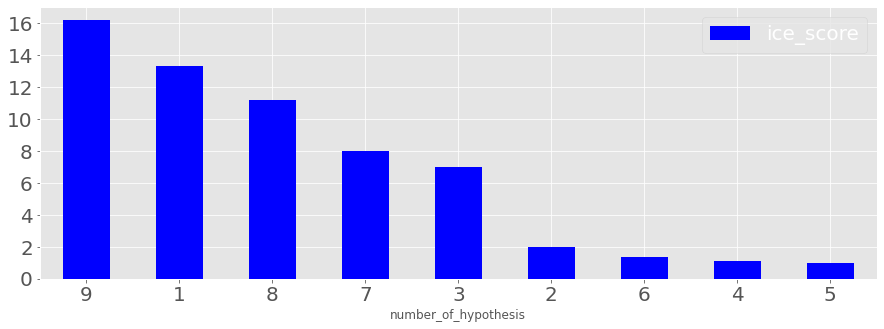

In [4]:
plt.style.use('ggplot')


# applying ICE 
hypothesis['ice_score'] = (hypothesis['impact'] * hypothesis['confidence'] 
                           / hypothesis['efforts'])
# saving indexes 
hypothesis['number_of_hypothesis'] = hypothesis.index

# not to have the zero hypothesis let's add 1 as a delta
hypothesis['number_of_hypothesis'] = hypothesis['number_of_hypothesis'] + 1

# visualizing with a barplot
hypothesis.\
    sort_values(by='ice_score', ascending=False).\
    plot(x='number_of_hypothesis', y='ice_score', grid=True, figsize=(15,5), 
         kind='bar',color='blue', fontsize = 20)
plt.xticks(rotation=0)
plt.legend(loc=1, prop={'size':20})

### To sum up:
- the more promising at the moment is 9th, but it does not consider the parameter Reach  

The final hypothesis:
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


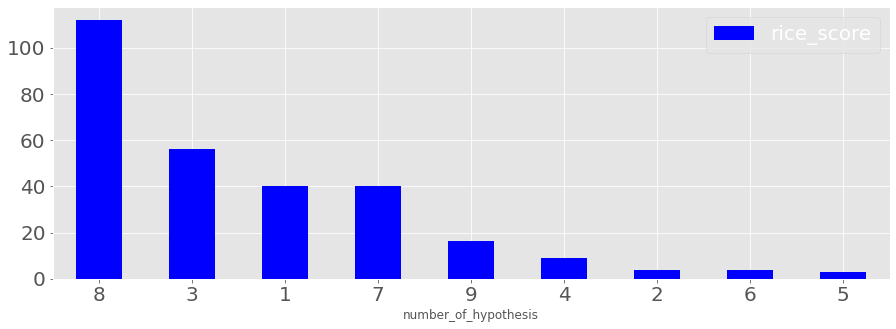

In [5]:
# RICE 
hypothesis['rice_score'] = (hypothesis['reach'] * hypothesis['impact'] * 
                            hypothesis['confidence'] / hypothesis['efforts'])

# visualizing with a barplot
hypothesis.\
    sort_values(by='rice_score', ascending=False).\
    plot(x='number_of_hypothesis', y='rice_score', grid=True, 
         figsize=(15,5), kind='bar',color='blue', fontsize = 20)
plt.xticks(rotation=0)
plt.legend(loc=1, prop={'size':20})

# printing the final hypothesis 
print('The final hypothesis:')
print('\033[1m' + hypothesis['hypothesis'][7] + '\033[0m')

### To sum up: 
- it seems that the 8th hypothesis reaches the biggest number of users, we are fairly confident about it and it'd have a comparable impact.

### Step 2. Analyzing an AB test <a id="step2"></a>   

In [6]:
# loading the data and glimpsing them
# ('/datasets/orders.csv')
orders = (
    pd.read_csv('orders.csv', sep = ',').
    assign(date = lambda x: pd.to_datetime(x['date'], format='%Y-%m-%d'))
)

#pd_p.ProfileReport(orders)
# выведем общую информацию о датафрейме: 
print_columns_info_missing_values_and_duplicates(orders)

The dataframe includes 5 columns. They are called ['transactionId', 'visitorId', 'date', 'revenue', 'group']
 
---------------------------------------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
 
---------------------------------------------------------------------------
 
In column transactionId there are 0 missing values
In column visitorId there are 0 missing values
In column date there are 0 missing values
In column revenue there are 0 missing values
In column group there are 0 missing values
 
---------------------------------------------------------------------------
 
There are 0 duplicates


In [7]:
# ('/datasets/visitors.csv')
visitors = (
    pd.read_csv('visitors.csv', sep=',').
    assign(date = lambda x: pd.to_datetime(x['date'], format='%Y-%m-%d'))
)

#pd_p.ProfileReport(visitors)
print_columns_info_missing_values_and_duplicates(visitors)

The dataframe includes 3 columns. They are called ['date', 'group', 'visitors']
 
---------------------------------------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
 
---------------------------------------------------------------------------
 
In column date there are 0 missing values
In column group there are 0 missing values
In column visitors there are 0 missing values
 
---------------------------------------------------------------------------
 
There are 0 duplicates


In [8]:
# creating an array of unique pairs of groups and dates
dates_groups = orders[['date', 'group']].drop_duplicates()

# cumulative order data by dates 
orders_aggregated = dates_groups.apply(lambda x: 
                        orders[np.logical_and(orders['date'] <= x['date'], 
                                              orders['group'] == x['group'])]\
                        .agg({'date':'max', 'group':'max', 
                              'transactionId': pd.Series.nunique, 
                        'visitorId':pd.Series.nunique, 'revenue':'sum'}), axis=1).\
                        sort_values(by=['date', 'group'])

# counting cumulative number of visitors per day 
visitors_aggregated = dates_groups.apply(lambda x: 
                                        visitors[np.logical_and(visitors['date']<= x['date'], 
                                        visitors['group'] == x['group'])]\
                                        .agg({'date':'max', 'group':'max', 
                                              'visitors':'sum'}), axis=1).\
                                        sort_values(by=['date','group'])

# merging previous results into a dataframe
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])

# renaming the columns
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# checking if everything worked correctly
cumulative_data.head(1)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719


### Visualizing cumulative revenues by groups 

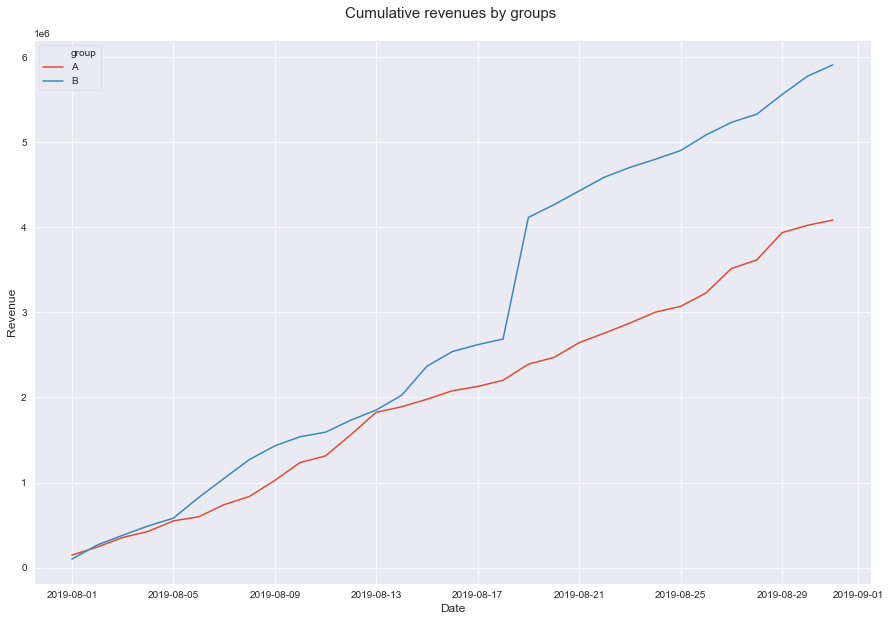

In [9]:
sns.set_style("dark")
plt.figure(figsize=(15,10))
sns.lineplot(x=cumulative_data['date'], y=cumulative_data['revenue'], 
             hue=cumulative_data['group'])
plt.title('Cumulative revenues by groups '+'\n', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### To sum up:
- during the first four days of the test, revenue for groups was quite similar, but after that, revenue for group B began to grow faster than for Group A
- by the end of the second week of the test, group revenues were again roughly the same, but later group B had a sharp increase on August 17. An outlier? 

### Plotting the cumulative average receipts by groups

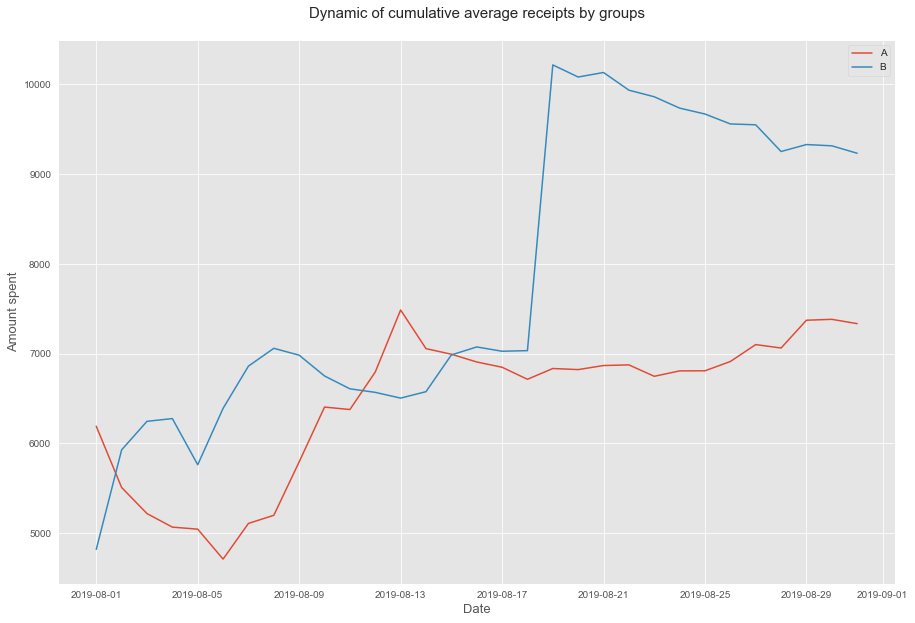

In [10]:
# creating dataframes which would include the cumulative numbers of visits and orders 

cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 
                                                                         'revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 
                                                                         'revenue', 'orders']]

# plotting the dynamic of average receipts by groups
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(cumulative_revenue_a['date'], (cumulative_revenue_a['revenue'] / 
                                        cumulative_revenue_a['orders']), label='A')
plt.plot(cumulative_revenue_b['date'], (cumulative_revenue_b['revenue'] / 
                                        cumulative_revenue_b['orders']), label='B')
plt.title('Dynamic of cumulative average receipts by groups'+'\n', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Amount spent', fontsize=13)
plt.legend()
plt.show()

### To sum up: 
- till the 17th of August the dynamic of average cumulative receipts is roughly similar, but it changes around the 17th 
- in the group B, we again see a sharp increase in the average check in the period from 17 to 21 August, but afterwards it "comes back to the average"

### Plotting the dynamic of cumulative average receipts in relative terms

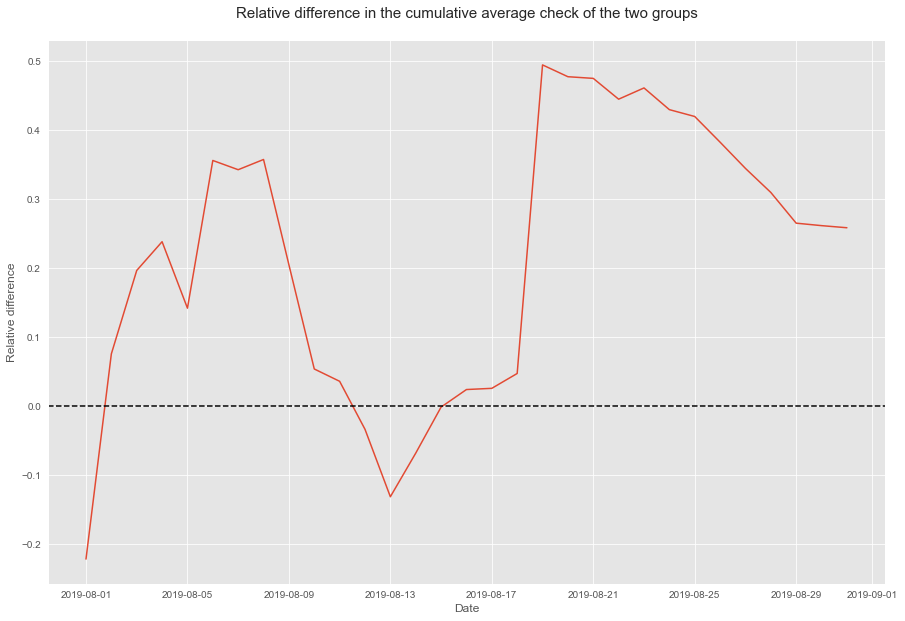

In [11]:
# collecting data of average receipts in one dataframe 
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', suffixes=['A','B']
)

# plotting the relative difference
merged_cumulative_revenue
plt.figure(figsize=(15,10))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB'] / 
                                             merged_cumulative_revenue['ordersB']) / 
                                            (merged_cumulative_revenue['revenueA'] / 
                                             merged_cumulative_revenue['ordersA'])-1)
plt.title('Relative difference in the cumulative average check of the two groups'+'\n', 
         fontsize=15)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Relative difference')
plt.xlabel('Date')
plt.grid(True)
plt.show()

### To sum up:
- before the 17th of August, the relationship between the relative changes in the average checks by groups was not established, but **after the 17th, something abnormal happened in Group B**, which significantly increased the average check of this group in relation to the average check of the group A

### Plotting the dynamic of cumulative conversions by groups

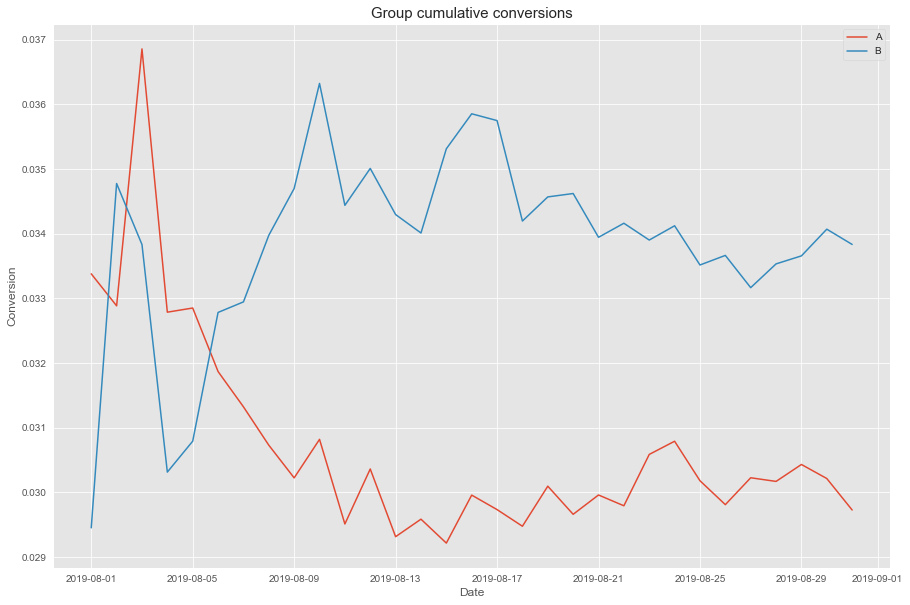

In [12]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']
plt.figure(figsize=(15,10))
plt.plot(cumulative_data_a['date'],
        cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], 
        cumulative_data_b['conversion'], label='B')
plt.title('Group cumulative conversions', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.legend()
plt.grid(True)
plt.show()

### To sum up:
- During the first couple of days, the groups fluctuated around the same value
- **after August 5th, the conversion rate of the group B became higher and it stayed higher during the whole test**

### Relative difference in the cumulative conversions between the groups

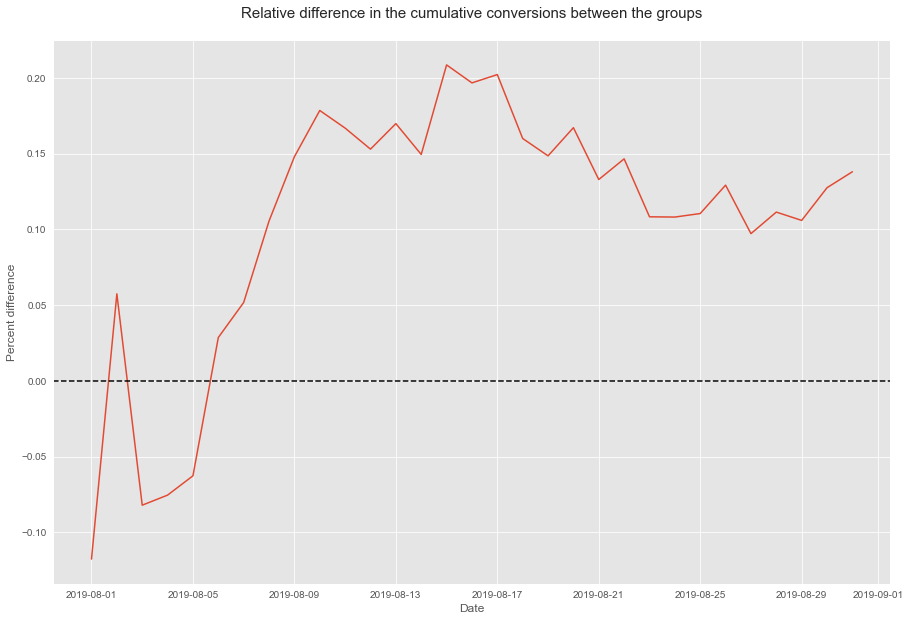

In [13]:
# сделаем датафрейм с конверсиями по обеим группам
merged_cumulative_conversions = cumulative_data_a[['date', 'conversion']].\
merge(cumulative_data_b[['date', 'conversion']], left_on='date', 
      right_on='date', how='left', suffixes=['A', 'B'])

# построим график 
plt.figure(figsize=(15,10))
plt.plot(merged_cumulative_conversions['date'],
        (merged_cumulative_conversions['conversionB']/
        merged_cumulative_conversions['conversionA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Percent difference')
plt.title('Relative difference in the cumulative conversions between the groups'+'\n', 
          fontsize=15)
plt.grid(True)
plt.show()

### To sum up:
- during the first week of the test, conversions fluctuated and it was impossible to draw a conclusion from the data 
- **after the first week of the test, the conversion rate of the group B began to surpass the group A and at the moment it is higher by approximately 10-15%**
- **the conversion ratio has already fixed**, we can conclude that the conversion rate in group B is higher

### Let's research the orders more dillegently. Plotting the distribution of the number of orders

Ten most frequent users:
         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


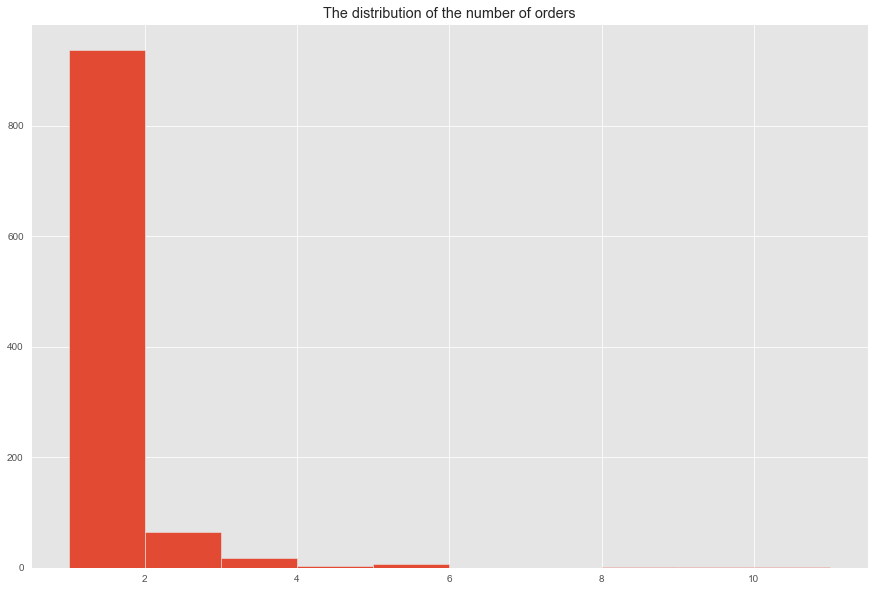

In [14]:
# how many times does an average user buy?
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1).\
groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_users.columns = ['user_id', 'orders']

# who are the most frequent users?
print('Ten most frequent users:')
print(orders_by_users.sort_values(by='orders', ascending=False).\
      head(10))

# the distribution of the number of orders
plt.figure(figsize=(15,10))
plt.title('The distribution of the number of orders')
plt.hist(orders_by_users['orders'])
plt.grid(True)
plt.show()

### To sum up: 
- the majority of users ordered once
- it's interesting that a significant number of users ordered from 2 to 4 times. To understand whether the number of orders from 2 to 4 should be considered abnormal, we need to calculate percentiles

### Calculating the 95th and 99th percentiles of orders

In [15]:
print(np.percentile(orders_by_users['orders'], [95,99]))

[2. 4.]


### To sum up:
- no more than 5 percent of users made more than 2 orders
- no more than 1 percent of users make 4 or more orders
- let's leave the 2 as the lower bound

### Scatter plot of the revenue

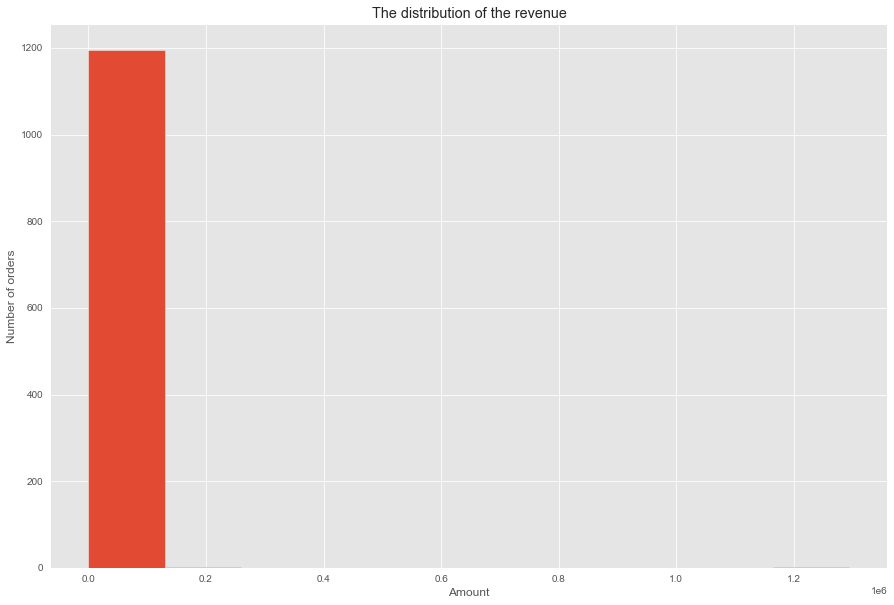

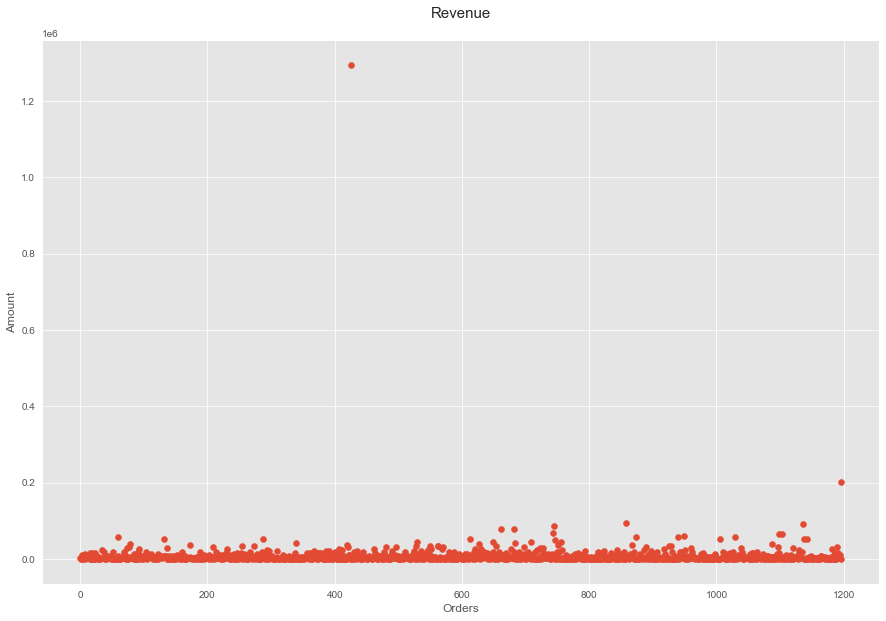

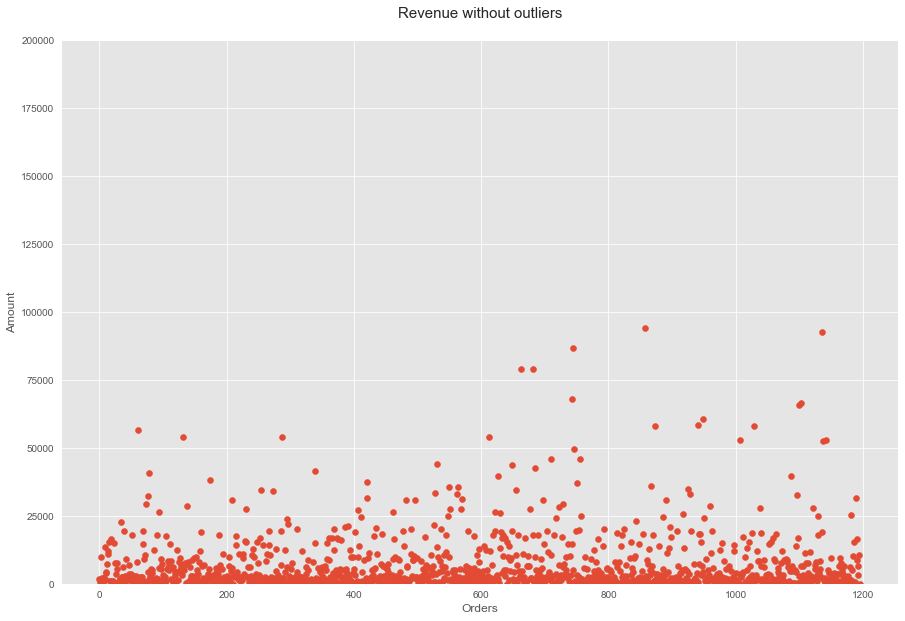

In [16]:
# the distribution of the revenue
plt.figure(figsize=(15,10))
plt.title('The distribution of the revenue')
plt.hist(orders['revenue'])
plt.xlabel('Amount')
plt.ylabel('Number of orders')
plt.grid(True)
plt.show()


x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,10))
plt.scatter(x_values, orders['revenue'])
plt.title('Revenue'+'\n', 
          fontsize=15)
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# there are two unusual orders: one for more than 1 million and the other for about 200 thousand 
# let's view the scatter plot without them
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,10))
plt.ylim(0, 200000)
plt.scatter(x_values, orders['revenue'])
plt.title('Revenue without outliers'+'\n', 
          fontsize=15)
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

### To sum up: 
- Almost all of the orders are less than 50000. 
- There are two outliers

### Do the group conversions differ statistically significantly 

In [17]:
for df in [orders, visitors]:
    display(df.info(), df.columns.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

['transactionId', 'visitorId', 'date', 'revenue', 'group']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

['date', 'group', 'visitors']

**Stating the null and alternative hypotheses:**

H0: *conversion in group A does not differ from the conversion of the group B*

HA: *conversions in two groups differ*

In [18]:
# calculating the number of users on a given day for the group A 
# to perform a statistical test, we will need people who have bought and people,
# who visited us, but did not buy
visitors_a_daily = visitors[visitors['group'] == "A"][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId', 
                                                           as_index=False)\
.agg({'transactionId': pd.Series.nunique})

# renaming the columns
orders_by_users_a.columns = ['user_id', 'orders']

# concatinating the users data with the Series which would contain zeros for everyone who visited but 
# did not buy

sample_a = pd.concat([orders_by_users_a['orders'], 
                      pd.Series(0, index=np.arange(
                          visitors_a_daily['visitors_per_date_a']\
                           .sum() - len(orders_by_users_a['orders'])),
                                name='orders')], axis=0)

# the same for the group B 
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']
orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId', 
                                                           as_index=False)\
.agg({'transactionId':pd.Series.nunique})

# renaming the columns
orders_by_users_b.columns = ['user_id', 'orders']
sample_b = pd.concat([orders_by_users_b['orders'], 
                      pd.Series(0, index=np.arange(
                          visitors_b_daily['visitors_per_date_b']\
                            .sum() - len(orders_by_users_b['orders'])),
                                name='orders')], axis=0)

# our distribution does not resemble normal, hence we need Mann Whitney test
mw_conversion_test_with_outliers = stats.mannwhitneyu(sample_a, sample_b)
alpha = 0.05
print('p-value: {0:.3f}'.format(
    mw_conversion_test_with_outliers.pvalue))

if mw_conversion_test_with_outliers.pvalue < alpha:
    print('Rejecting the null')
else:
    print('Failing to reject the null')

# relative difference in conversions     
print('In the group A the conversion is lower by {0:.2%}'.\
      format(sample_a.mean()/sample_b.mean()-1))

p-value: 0.008
Rejecting the null
In the group A the conversion is lower by -12.13%


In [19]:
print('In the group B the conversion is higher by {0:.2%}'.\
      format(abs(sample_b.mean()/sample_a.mean()-1)))

In the group B the conversion is higher by 13.81%


### Do average receipts in groups differ statistically significantly? 

H0: average receipts do not differ

HA: average receipts in two groups differ

Before conducting a statistical test, let's view the distributions

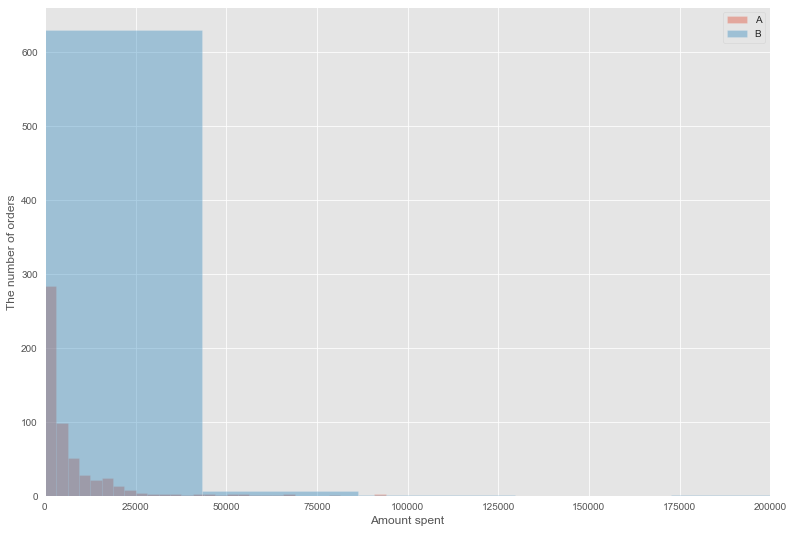

In [20]:
plt.figure(figsize=(13,9))
sns.distplot(orders[orders['group']=='A']['revenue'], 
            kde=False, bins=30, label='A')
sns.distplot(orders[orders['group']=='B']['revenue'],
            kde=False, bins=30, label='B')
plt.xlim(0, 200000)
plt.ylabel('The number of orders')
plt.xlabel('Amount spent')
plt.legend()
plt.grid(True)
plt.show()

**We need to get rid of the outliers and view the distributions once again**

In [21]:
mw_av_receipt_test_with_outliers = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                      orders[orders['group']=='B']['revenue'])

# p-value
print('p-value: {0:.3f}'.format(mw_av_receipt_test_with_outliers.pvalue))


if mw_av_receipt_test_with_outliers.pvalue < alpha:
    print('Rejecting the null')
else:
    print('Failling to reject the null')

# relative difference in average receipts
diff_in_av_receipts = (orders[orders['group']=='B']
    ['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()- 1)

print('The average receipt in group B is {0:.2%} higher, than in group A'.format(diff_in_av_receipts))

p-value: 0.365
Failling to reject the null
The average receipt in group B is 25.87% higher, than in group A


### To sum up:
- the average receipts do not differ statistically significantly
- however, the average receipt in the group B is almost 26% higher 

### Let's get rid of the outliers and redo the tests 

In [22]:
# np.percentile(orders_by_users['orders'], 95)
orders_by_users = orders.groupby('visitorId', as_index=False).\
agg({'transactionId':pd.Series.nunique})

# let's only take users who ordered no more than 2 times
users_with_many_orders = orders_by_users[orders_by_users['transactionId'] > np.\
                                         percentile(orders_by_users['transactionId'], 
                                                    95)]['visitorId']

# and spent no more than 28 thousand 
users_with_expensive_orders = orders[orders['revenue'] > np.\
                                    percentile(orders['revenue'], 95)]['visitorId']

# merging them in one dataframe  
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders],
                           axis=0).drop_duplicates().sort_values()

print(abnormal_users.head(3), 
      abnormal_users.shape)

# filtering the data
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(
    orders_by_users_a['user_id'].isin(abnormal_users))]['orders'], 
    pd.Series(0, index=np.arange(visitors_a_daily['visitors_per_date_a']\
            .sum() - len(orders_by_users_a['orders'])),
                name='orders')], axis=0)
    
sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(
    orders_by_users_b['user_id'].isin(abnormal_users))]['orders'], 
    pd.Series(0, index=np.arange(visitors_b_daily['visitors_per_date_b']\
            .sum() - len(orders_by_users_b['orders'])),
                name='orders')], axis=0)

1099    148427295
44      199603092
928     204675465
Name: visitorId, dtype: int64 (83,)


In [23]:
mw_conversion_test_without_outliers = stats.mannwhitneyu(sample_a_filtered, 
                                                         sample_b_filtered)
alpha = 0.05
print('p-value {0:.3f}'.format(mw_conversion_test_without_outliers.pvalue))
if mw_conversion_test_without_outliers.pvalue < alpha:
    print('Rejecting the null')
else:
    print('Failing to reject the null')
print('Group A conversion is lower by {0:.2%}'.\
      format(abs(sample_a_filtered.mean()/sample_b_filtered.mean()-1)))

p-value 0.006
Rejecting the null
Group A conversion is lower by 14.94%


### To sum up:
Based on the results of the statistical nonparametric Mann-Whitney test on data with and without outliers, it can be infered that the conversion in group B is higher and this is a statistically significant difference


### Does the average receipts differ on data with no outliers? 

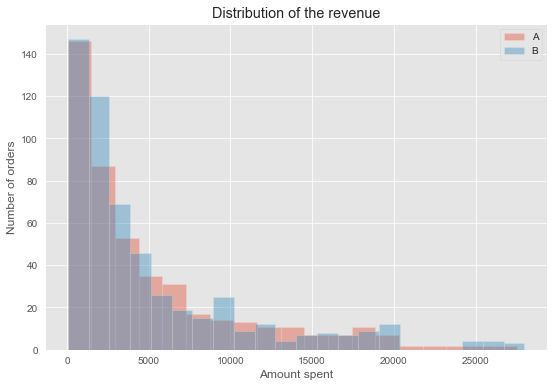

In [24]:
# viewing the distributions
plt.figure(figsize=(9,6))
sns.distplot(orders[np.logical_and(
        orders['group']=="A",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
             label="A", kde=False)
sns.distplot(orders[np.logical_and(
        orders['group']=="B",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'], 
             label="B", kde=False)
plt.ylabel('Number of orders')
plt.xlabel('Amount spent')
plt.title('Distribution of the revenue')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Mann Whitney test
mw_av_receipt_test_without_outliers = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=="A",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=="B",
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])
print('p-value: {0:.3f}'.format(mw_av_receipt_test_without_outliers.pvalue))
if mw_av_receipt_test_without_outliers.pvalue < alpha:
    print('Rejecting the null')
else:
    print('Failed to reject the null')


# посчитаем относительное разиличие в чеках
print('In the group A the conversion is lower by {0:.2%}'.format(
    abs(orders[np.logical_and(orders['group']=='B',
                              np.logical_not(orders['visitorId'].\
                                             isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].\
                       isin(abnormal_users)))]['revenue'].mean() - 1)))

p-value: 0.376
Failed to reject the null
In the group A the conversion is lower by 2.21%


**We still cannot reject the null hypotheses, however, we could see that a lot of variety was due to the outliers.**

## to sum up: 

The analysis lead to the following conclusions:

- by the end of the second week, revenues in groups were approximately equal, but later group B had a sharp increase on August 17, which was caused by an abnormally large order (more than 1 million 200 thousand). **There is no statistically significant difference in the size of average receipts in groups**
- After August 5th, the conversion rate of the group B became higher and later it was fixed. **We got a statistically significant difference in conversions of the two groups**
- **The AB test was successfull, the conversion in group B is higher** 